In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import copy
import random
%matplotlib inline
import math as math
warnings.filterwarnings('ignore')

# Loading Datasets

## Training Data

In [2]:
ColNames = ('age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class')

ColTypes = {'age':np.float64,'workclass':object,'fnlwgt':np.float64,'education':object,'education-num':np.float64,'marital-status':str,'occupation':object,'relationship':object,'race':object,'sex':object,'capital-gain':np.float64,'capital-loss':np.float64,'hours-per-week':np.float64,'native-country':object,'class':object}

Training_Data = pd.read_table('../input/dm2022-a2/adult.data', delimiter=',', names=ColNames,
                   dtype=ColTypes)
Training_Data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
Training_Data.shape

(32561, 15)

## Testing Data


In [4]:
ColNames = ('age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class')

ColTypes = {'age':np.float64,'workclass':object,'fnlwgt':np.float64,'education':object,'education-num':np.float64,'marital-status':object,'occupation':object,'relationship':object,'race':object,'sex':object,'capital-gain':np.float64,'capital-loss':np.float64,'hours-per-week':np.float64,'native-country':object,'class':object}

Testing_Data = pd.read_table('../input/dm2022-a2/adult.test', delimiter=',', names=ColNames,
                   dtype=ColTypes,skiprows=1)
Testing_Data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [5]:
Testing_Data.shape

(16281, 15)

# Data Description

## Training Data

In [6]:
Training_Data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
Training_Data.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
class              object
dtype: object

## Testing Data

In [8]:
Testing_Data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [9]:
Testing_Data.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
class              object
dtype: object

## Label counts in Training and Testing datasets

In [10]:
for col in Training_Data.columns:
  if Training_Data[col].dtype == "object":
    print('Attribute name:',col)
    print('-------------------')
    print(Training_Data[col].value_counts())
    print('-------------------')



Attribute name: workclass
-------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
-------------------
Attribute name: education
-------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
-------------------
Attribute name: marital-status
-------------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed          

In [11]:
for col in Testing_Data.columns:
  if Testing_Data[col].dtype == "object":
    print('Attribute name:',col)
    print('-------------------')
    print(Training_Data[col].value_counts())
    print('-------------------')


Attribute name: workclass
-------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
-------------------
Attribute name: education
-------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
-------------------
Attribute name: marital-status
-------------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed          

# Data cleaning

In [12]:
def RemoveWhiteSpaces(df):
    for col in df.columns:
        if(df[col].dtype == "object"):
            df[col] = df[col].str.strip()
    df['class'] = df['class'].str.strip()
    return df

In [13]:
def RemoveNulls(df_):
    #first replace all empty cells with NaN
    for col in df_.columns:
        df_[[col]] = df_[[col]].replace(' ?',np.NaN)
        df_[[col]] = df_[[col]].replace('?',np.NaN)

    #drop all rows that has null values
    df_ = df_.dropna()
    
    return df_

In [14]:
# Normalise and standardize
def NormStd(dataset):
    from sklearn.preprocessing import StandardScaler, OrdinalEncoder

    # Create a dataframe with float64 data type
    colname= []
    for col in dataset.columns:
      if dataset[col].dtype == "float64":
          colname.append(col)

    # Create copies of dataset for data preparation purposes
    df_copy = dataset.copy(deep = True)
    df_fe = dataset.copy()

    # Create dataframe for categorical features 
    df_fe.drop('class',axis='columns', inplace=True)
    df_fe.drop(colname,axis='columns', inplace=True)

    # create dataframe for target class
    df_cl = dataset.copy()
    df_cl.drop(df_copy.iloc[:,:-1],axis='columns', inplace=True)


    # create a scaler object
    std_scaler = StandardScaler()

    # Normalize numeric attributes and assign it into a new dataframe
    df_norm = pd.DataFrame(std_scaler.fit_transform(df_copy[colname]), columns=colname)
    
    ord_enc = OrdinalEncoder()

    # enconde categorical features into numerical features
    for col in df_fe.columns[:]:
      if df_fe[col].dtype == "object":
        df_fe[col] = ord_enc.fit_transform(df_fe[[col]])
        
    df_norm.insert(0, 'id', range(0, 0 + len(df_norm)))
    df_fe.insert(0, 'id', range(0, 0 + len(df_fe)))
    df_cl.insert(0, 'id', range(0, 0 + len(df_cl)))


    df_feature = pd.merge(df_norm,df_fe, on=["id"])
    df_final = pd.merge(df_feature,df_cl, on=["id"])

    # Drop id column from the merged dataset
    df_final.drop('id',axis='columns', inplace=True)

    # Show the the tope 5 obersrvation of the dataset
    df_final.head(5)
    
    return df_final

## Training Data

In [15]:
Training_Data = RemoveWhiteSpaces(Training_Data)
Training_Data = RemoveNulls(Training_Data)
Training_Data = NormStd(Training_Data)

In [16]:
Training_Data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,1.535952e-16,1.684365e-17,-3.053058e-16,-2.720897e-17,7.703318e-17,-2.833973e-16,2.199324,10.333764,2.580134,5.959850,1.418341,3.678602,0.675685,36.382567
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.953925,3.812292,1.498016,4.029566,1.601338,0.834709,0.468126,6.105372
min,-1.632189e+00,-1.666094e+00,-3.577051e+00,-1.474446e-01,-2.185860e-01,-3.333218e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.946967e-01,-6.830644e-01,-4.397382e-01,-1.474446e-01,-2.185860e-01,-7.773411e-02,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,38.000000
50%,-1.094756e-01,-1.076072e-01,-4.757405e-02,-1.474446e-01,-2.185860e-01,-7.773411e-02,2.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000
75%,6.518811e-01,4.527602e-01,1.128918e+00,-1.474446e-01,-2.185860e-01,3.396356e-01,2.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000
max,3.925715e+00,1.225647e+01,2.305411e+00,1.335458e+01,1.055581e+01,4.847229e+00,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000


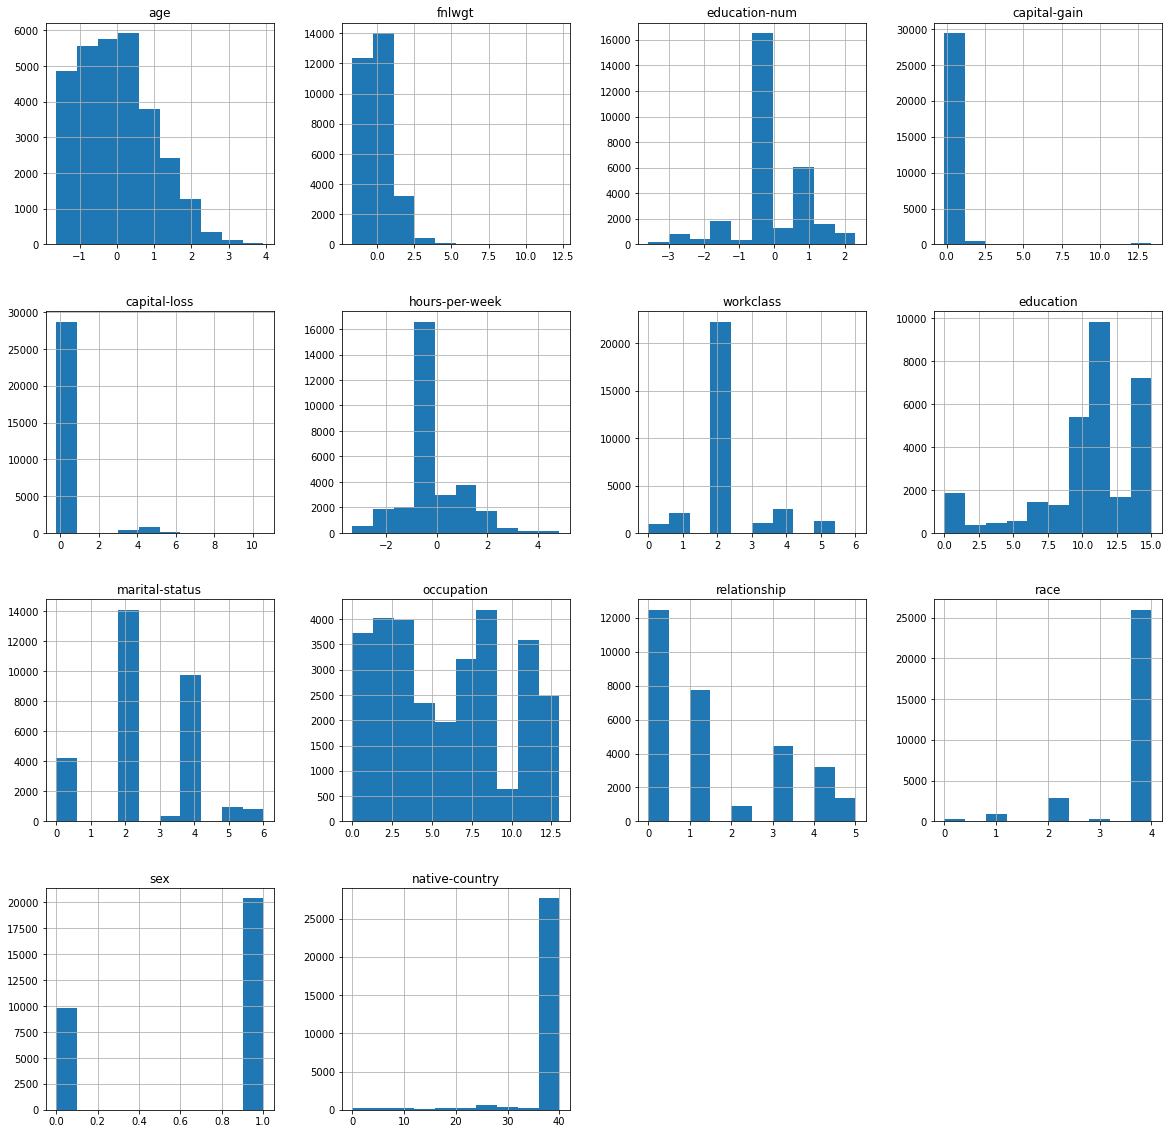

In [17]:
p = Training_Data.hist(figsize = (20,20))

## Testing Dataset

In [18]:
Testing_Data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [19]:
Testing_Data = RemoveWhiteSpaces(Testing_Data)
Testing_Data = RemoveNulls(Testing_Data)
Testing_Data = NormStd(Testing_Data)

In [20]:
Testing_Data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,-1.029005,0.352098,-1.216563,-0.145438,-0.219169,-0.078889,2.0,1.0,4.0,6.0,3.0,2.0,1.0,37.0,<=50K.
1,-0.057423,-0.944995,-0.434898,-0.145438,-0.219169,0.750131,2.0,11.0,2.0,4.0,0.0,4.0,1.0,37.0,<=50K.
2,-0.804794,1.395062,0.737599,-0.145438,-0.219169,-0.078889,1.0,7.0,2.0,10.0,0.0,4.0,1.0,37.0,>50K.
3,0.391000,-0.277369,-0.044066,0.852624,-0.219169,-0.078889,2.0,15.0,2.0,6.0,0.0,2.0,1.0,37.0,>50K.
4,-0.356371,0.085944,-1.607395,-0.145438,-0.219169,-0.907909,2.0,0.0,4.0,7.0,1.0,4.0,1.0,37.0,<=50K.


In [21]:
#removing the . from the class column
Testing_Data['class'] = Testing_Data['class'].str[:-1:]

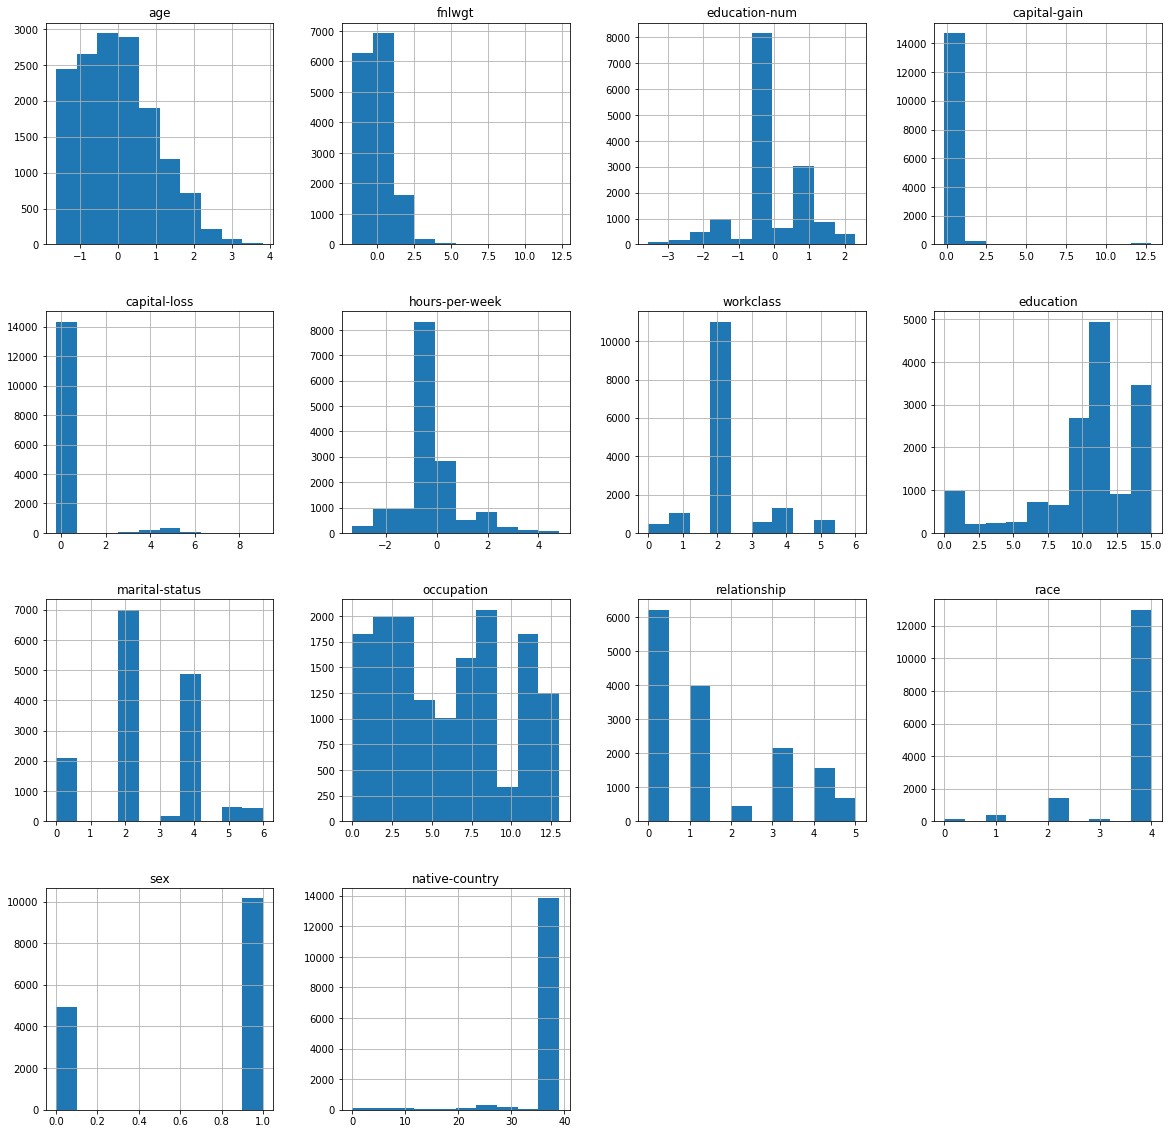

In [22]:
p = Testing_Data.hist(figsize = (20,20))

# KNN Model

## Utility Functions

In [23]:
def Eculidian_Distance(A,B):
    return np.linalg.norm(np.subtract(B, A))

In [24]:
def getNeighbors(TrainingSet, testInstance, K_neighbors, AdultData_Training):
    distances = []
    for i in range(len(TrainingSet)):
        distances.append((Eculidian_Distance(TrainingSet[i], testInstance), AdultData_Training[i]))
    distances.sort(key=lambda x: x[0])
    return distances[:K_neighbors]

In [25]:
def KNN_Prediction(testNeighbors):
    # "For neighbors of eachinstance of Test Set"
    prediction = []
    itr = 1
    for neighbors in testNeighbors:
        class_counter = Counter()
        for neighbor in neighbors:
            class_counter[neighbor[1]] += 1
        prediction.append((itr,class_counter.most_common(1)[0][0]))
        itr += 1
    return prediction

In [26]:
def createEvalMatrix(prediction, actual):
    indexes = np.unique(actual)
    print("indexes: ", indexes)
    df = pd.DataFrame(0, columns =indexes,index = indexes)
    for i in range(len(actual)):
        if (prediction[i][1] == actual[i]):
            df.loc[prediction[i][1]][actual[i]] += 1
        else:
            df.loc[prediction[i][1]][actual[i]] += 1
    return df  

In [27]:
def GetEvalVars(EvalMatrix, class_, classes_):
    tp = EvalMatrix[class_][class_]
    fp = 0
    for i in range(len(classes_)):
        if classes_[i] != class_:
            fp += EvalMatrix[class_][classes_[i]]

    fn = 0
    for i in range(len(classes_)):
        if classes_[i] != class_:
            fn += EvalMatrix[classes_[i]][class_]
  
    tn = 0
    for i in range(len(classes_)):
        if classes_[i] != class_:
            for j in range(len(classes_)):
                if classes_[j] != class_:
                    tn += EvalMatrix[classes_[i]][classes_[j]]
  
    eval_variables_dict = {'Tp':tp, 'Tn':tn, 'Fp':fp, 'Fn':fn}
    return eval_variables_dict 


In [28]:
def Evaulate(predictions, actual):
    EvalMatrix_df = createEvalMatrix(predictions, actual)
  # print(EvalMatrix_df)
    Classes = np.unique(actual)
    EvaVars = dict()
    for i in range(len(Classes)):
        EvaVars[Classes[i]] = GetEvalVars(EvalMatrix_df, Classes[i], Classes)
  # print(EvaVars)
    evaluations_dict = dict()
    for i in range(len(Classes)):
        class_ = Classes[i]
        tp = EvaVars[Classes[i]]['Tp']
        tn = EvaVars[Classes[i]]['Tn']
        fp = EvaVars[Classes[i]]['Fp']
        fn = EvaVars[Classes[i]]['Fn']

    print('True Negative: ', tn)
    print('False Positive: ', fp)
    print('False Negatives: ', fn)
    print('True Positives: ', tp)
    accuracy = (tp + tn)/(tp + tn + fp + fn )
    evaluations_dict[class_] = dict()
    evaluations_dict[class_]['Accuracy'] = accuracy

    precision = (tp)/(tp+fp)
    evaluations_dict[class_]['Precision'] = precision
    
    recall = (tp)/(fn+tp)
    evaluations_dict[class_]['Recall'] = recall

    f1 = (2*precision*recall)/(precision+recall)
    evaluations_dict[class_]['F-1'] = f1
  
    return evaluations_dict
  

In [29]:
def KNN(TrainingSet, TestSet, AdultData_Training, AdultData_Testing, K):
    testNeighbors = []

    for i in range(len(TestSet)):
    # "For ech instance of Test Data we have a list of K neighbors"
        testNeighbors.append(getNeighbors(TrainingSet, TestSet[i], K, AdultData_Training))
    return KNN_Prediction(testNeighbors)

In [30]:
def RunKnn(TrainingSet_, TestSet_, AdultData_Training_, AdultData_Testings_, iterations):
    k=13
    for i in range(iterations):
        
        PredictedResult = KNN(TrainingSet_, TestSet_, AdultData_Training_, AdultData_Testings_, k)
#         print("Predicted Result: ", PredictedResult)
        eval_results = Evaulate(PredictedResult,AdultData_Testings_ )

        for key in eval_results.keys():
            print("For Class = ",key, ": ", eval_results[key])
            




## Preparing data to send into model

In [31]:
Test_X = Testing_Data.drop('class',axis=1)
Test_Y = Testing_Data['class']

In [32]:
Test_X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,-1.029005,0.352098,-1.216563,-0.145438,-0.219169,-0.078889,2.0,1.0,4.0,6.0,3.0,2.0,1.0,37.0
1,-0.057423,-0.944995,-0.434898,-0.145438,-0.219169,0.750131,2.0,11.0,2.0,4.0,0.0,4.0,1.0,37.0
2,-0.804794,1.395062,0.737599,-0.145438,-0.219169,-0.078889,1.0,7.0,2.0,10.0,0.0,4.0,1.0,37.0
3,0.391000,-0.277369,-0.044066,0.852624,-0.219169,-0.078889,2.0,15.0,2.0,6.0,0.0,2.0,1.0,37.0
4,-0.356371,0.085944,-1.607395,-0.145438,-0.219169,-0.907909,2.0,0.0,4.0,7.0,1.0,4.0,1.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,0.526407,1.128431,-0.145438,-0.219169,-0.078889,2.0,9.0,4.0,9.0,3.0,4.0,1.0,37.0
15056,0.017315,0.244316,1.128431,-0.145438,-0.219169,-0.410497,2.0,9.0,0.0,9.0,1.0,4.0,0.0,37.0
15057,-0.057423,1.755175,1.128431,-0.145438,-0.219169,0.750131,2.0,9.0,2.0,9.0,0.0,4.0,1.0,37.0
15058,0.391000,-1.001078,1.128431,0.562734,-0.219169,-0.078889,2.0,9.0,0.0,0.0,3.0,1.0,1.0,37.0


In [33]:
Test_Y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
15055    <=50K
15056    <=50K
15057    <=50K
15058    <=50K
15059     >50K
Name: class, Length: 15060, dtype: object

### Balancing Training Data

#### Class distribution in training data

<AxesSubplot:>

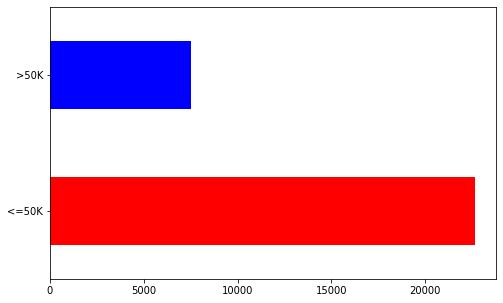

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
colors = ['red','blue']
Training_Data['class'].value_counts().plot(kind='barh', color=colors)


In [35]:
vals = Training_Data['class'].unique()
vals

array(['<=50K', '>50K'], dtype=object)

In [36]:
print(vals[0])
print(vals[1])

<=50K
>50K


In [37]:
train_low = Training_Data[(Training_Data['class'] == vals[0] )]

train_high = Training_Data[Training_Data['class'] == vals[1]]

In [38]:
train_low.shape

(22654, 15)

In [39]:
train_high.shape

(7508, 15)

In [40]:
train_df = pd.concat([
  train_low.sample(2000),
  train_high.sample(2000)
])

In [41]:
Train_X = train_df.drop('class',axis=1)
Train_Y = train_df['class']

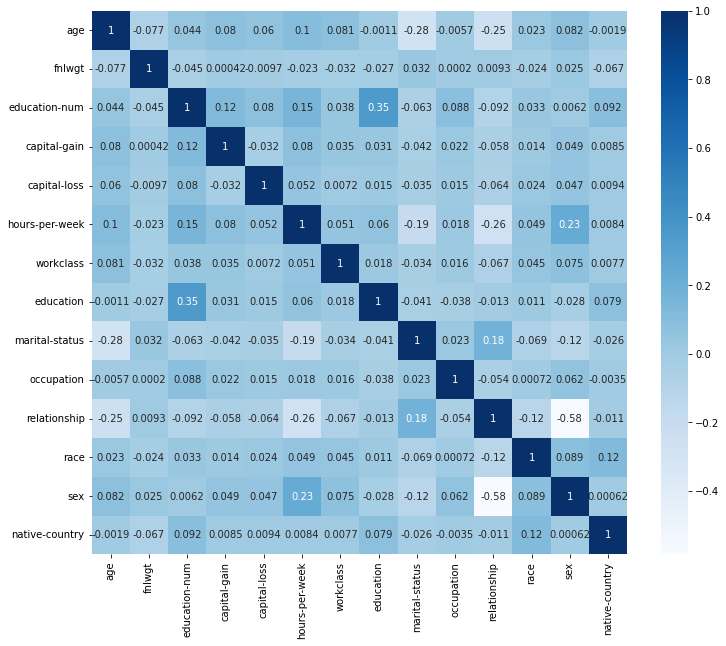

In [42]:
# Correlation of each feature
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
p=sns.heatmap(Training_Data.corr(), annot=True,cmap ='Blues') 

### Balancing Testing Data

#### Class Distribution in Testing data

<AxesSubplot:>

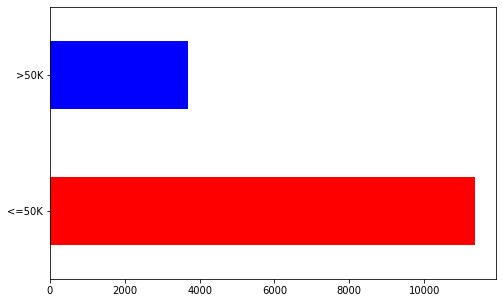

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
colors = ['red','blue']
Testing_Data['class'].value_counts().plot(kind='barh', color=colors)

In [44]:
vals = Testing_Data['class'].unique()
vals

array(['<=50K', '>50K'], dtype=object)

In [45]:
test_low = Testing_Data[(Testing_Data['class'] == vals[0] )]

test_high = Testing_Data[Testing_Data['class'] == vals[1]]

In [46]:
test_low.shape, test_high.shape

((11360, 15), (3700, 15))

In [47]:
test_df = pd.concat([
  test_low.sample(500),
  test_high.sample(500)
])

In [48]:
Test_X = test_df.drop('class',axis=1)
Test_Y = test_df['class']

In [49]:
RunKnn(np.array(Train_X), np.array(Test_X),np.array(Train_Y), np.array(Test_Y), 1)

indexes:  ['<=50K' '>50K']
True Negative:  374
False Positive:  87
False Negatives:  126
True Positives:  413
For Class =  >50K :  {'Accuracy': 0.787, 'Precision': 0.826, 'Recall': 0.7662337662337663, 'F-1': 0.794995187680462}


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(Train_X, Train_Y)

LogisticRegression()

In [51]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.75


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Test_Y, y_pred)
print(confusion_matrix)

[[377 123]
 [127 373]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

       <=50K       0.75      0.75      0.75       500
        >50K       0.75      0.75      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

